In [1]:
cd /content/drive/MyDrive/ERA V2/S7

/content/drive/MyDrive/ERA V2/S7


In [2]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net1
from utils import train, test
import torch.nn.functional as F

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)


CUDA Available? True


CODE BLOCK 2

In [8]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net1().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 30, 22, 22]           4,350
              ReLU-8           [-1, 30, 22, 22]               0
       BatchNorm2d-9           [-1, 30, 22, 22]              60
           Conv2d-10           [-1, 30, 11, 11]             930
             ReLU-11           [-1, 30, 11, 11]               0
      BatchNorm2d-12           [-1, 30, 11, 11]              60
           Conv2d-13             [-1, 16, 9, 9]           4,336
             ReLU-14             [

CODE BLOCK: **3**

In [9]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK:4

In [10]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK:5

In [11]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK 6

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


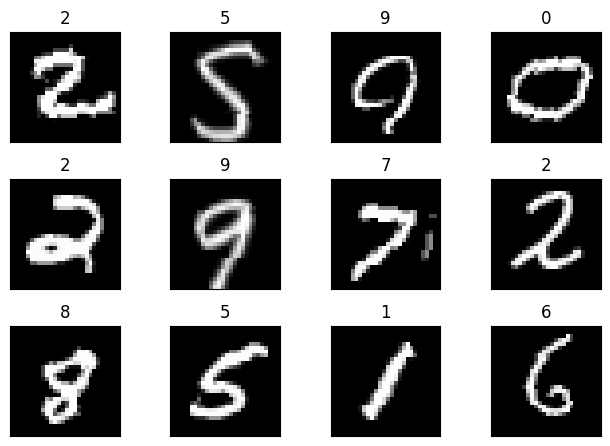

In [12]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])


CODE BLOCK 7

In [13]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1440 Batch_id=117 Accuracy=88.30: 100%|██████████| 118/118 [00:19<00:00,  6.04it/s]


Test set: Average loss: 0.0698, Accuracy: 9789/10000 (97.89%)

Epoch 2


Train: Loss=0.0537 Batch_id=117 Accuracy=97.78: 100%|██████████| 118/118 [00:20<00:00,  5.88it/s]


Test set: Average loss: 0.0527, Accuracy: 9852/10000 (98.52%)

Epoch 3


Train: Loss=0.0836 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 0.0367, Accuracy: 9892/10000 (98.92%)

Epoch 4


Train: Loss=0.1104 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:19<00:00,  6.18it/s]


Test set: Average loss: 0.0352, Accuracy: 9895/10000 (98.95%)

Epoch 5


Train: Loss=0.0228 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0309, Accuracy: 9908/10000 (99.08%)

Epoch 6


Train: Loss=0.0488 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:19<00:00,  6.13it/s]


Test set: Average loss: 0.0203, Accuracy: 9938/10000 (99.38%)

Epoch 7


Train: Loss=0.0156 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 0.0205, Accuracy: 9936/10000 (99.36%)

Epoch 8


Train: Loss=0.0285 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]


Test set: Average loss: 0.0198, Accuracy: 9943/10000 (99.43%)

Epoch 9


Train: Loss=0.0051 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0192, Accuracy: 9945/10000 (99.45%)

Epoch 10


Train: Loss=0.0094 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:19<00:00,  6.05it/s]


Test set: Average loss: 0.0197, Accuracy: 9943/10000 (99.43%)

Epoch 11


Train: Loss=0.0212 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:19<00:00,  5.90it/s]


Test set: Average loss: 0.0191, Accuracy: 9949/10000 (99.49%)

Epoch 12


Train: Loss=0.0236 Batch_id=117 Accuracy=99.25: 100%|██████████| 118/118 [00:19<00:00,  6.04it/s]


Test set: Average loss: 0.0189, Accuracy: 9948/10000 (99.48%)

Epoch 13


Train: Loss=0.0224 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:19<00:00,  5.98it/s]


Test set: Average loss: 0.0190, Accuracy: 9947/10000 (99.47%)

Epoch 14


Train: Loss=0.0074 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:19<00:00,  6.11it/s]


Test set: Average loss: 0.0190, Accuracy: 9948/10000 (99.48%)

Epoch 15


Train: Loss=0.0142 Batch_id=117 Accuracy=99.25: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.0192, Accuracy: 9947/10000 (99.47%)



Target

1.Set up a model strcture from previous exercise

2.Basic code from previous exercise

3.Centercrop as transform

Results

1.Train Acc:99.21

2.Test Acc :99.48

3.Parameter:20k

**Analysis**


  1.The model does achive the target of 99.4% accuracy and it is consistent too he

  2. The model is underfitting wihout any drop out

  3.lets see what the model can do with the least paramters setup


[]

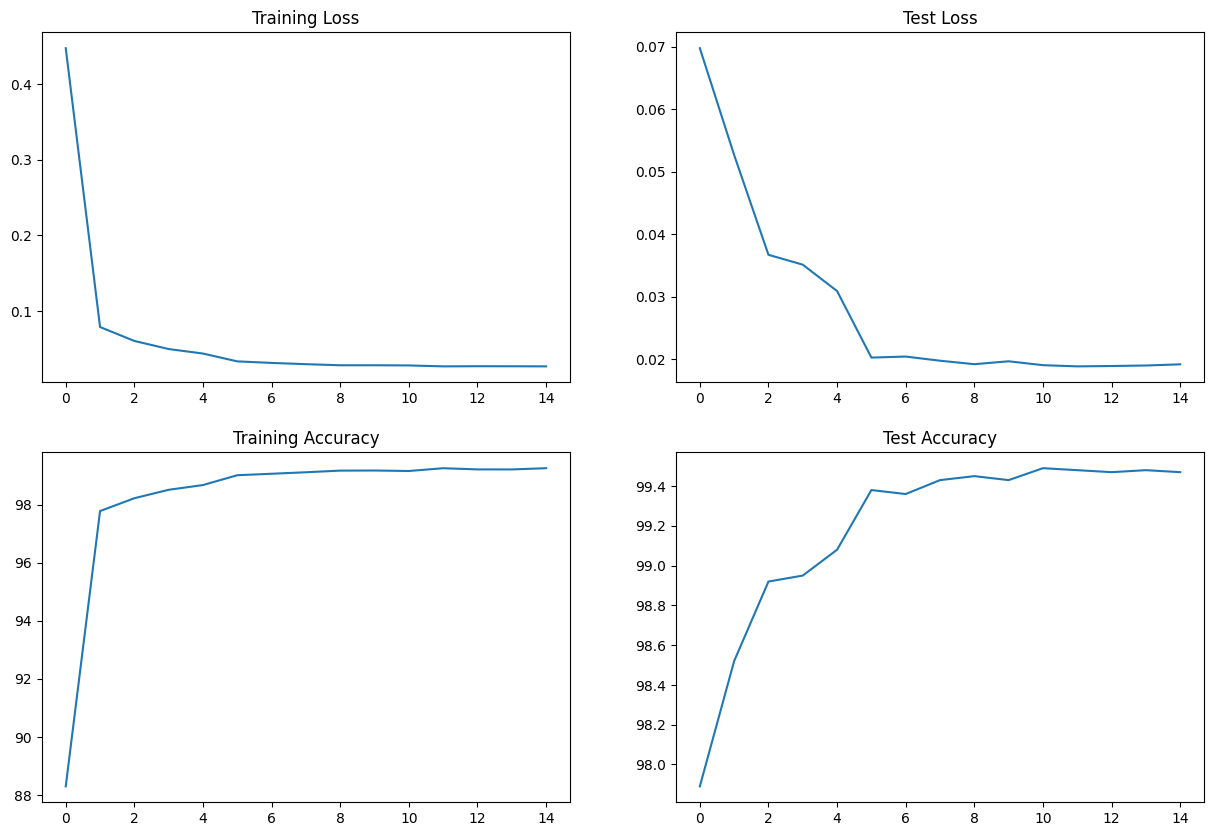

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()
